In [3]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

def load_images_from_path(path, label):
    images, labels = [], []

    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20),
                            subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_train, y_train, x_test, y_test = [], [], [], []

Cáo Bắc cực

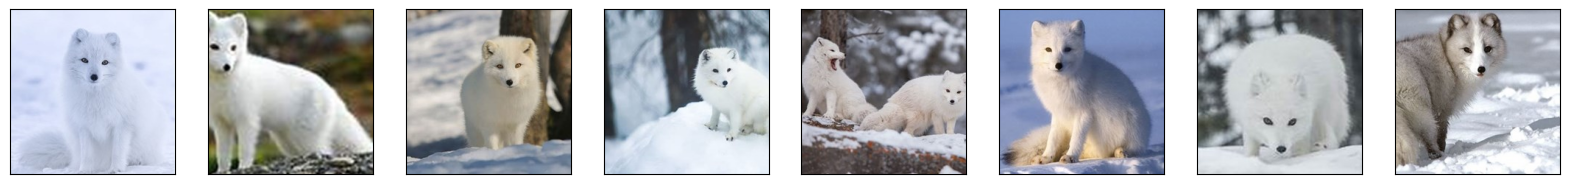

In [4]:
images, labels = load_images_from_path('Data/train/arctic_fox', 0)
show_images(images)

x_train += images
y_train += labels

Gấu Bắc cực

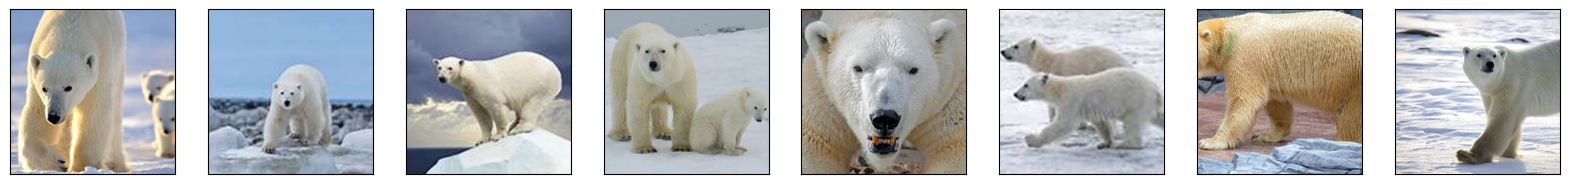

In [5]:
images, labels = load_images_from_path('Data/train/polar_bear', 1)
show_images(images)

x_train += images
y_train += labels

Hải mã

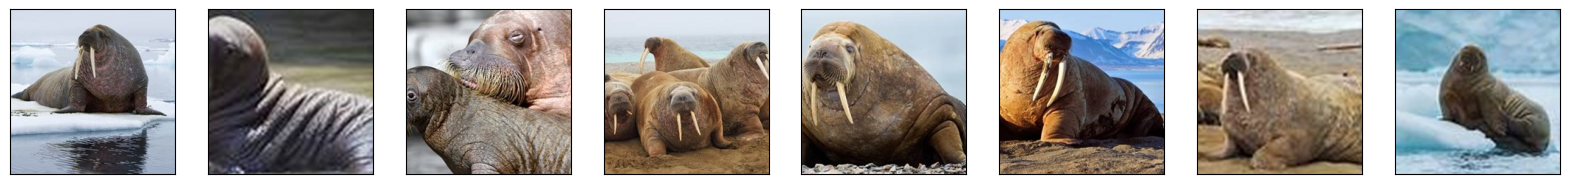

In [6]:
images, labels = load_images_from_path('Data/train/walrus', 2)
show_images(images)

x_train += images
y_train += labels

Tập test cho cáo bắc cực, gấu bắc cực, hải mã

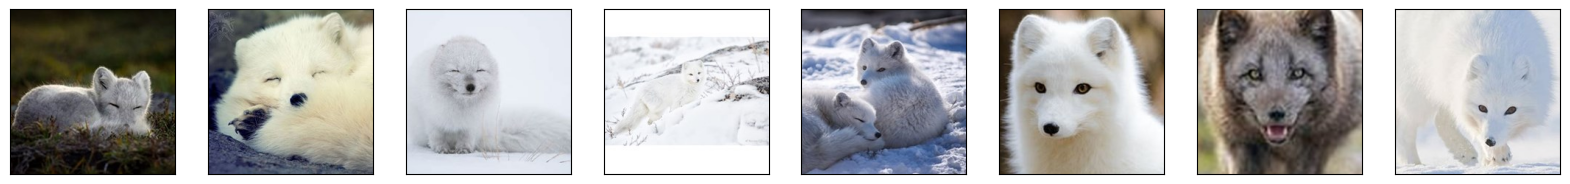

In [7]:
images, labels = load_images_from_path('Data/test/arctic_fox', 0)
show_images(images)

x_test += images
y_test += labels

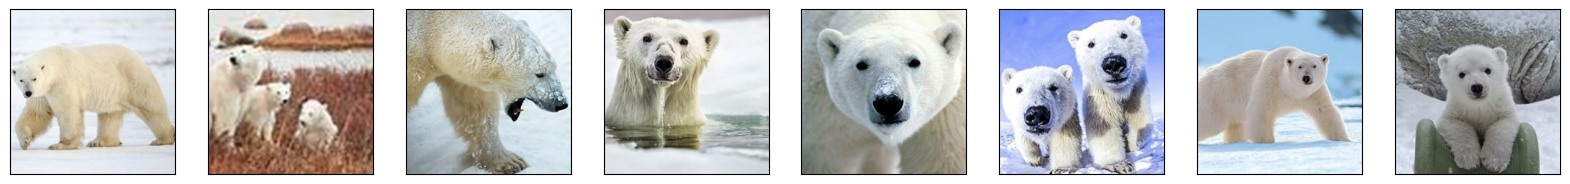

In [8]:
images, labels = load_images_from_path('Data/test/polar_bear', 1)
show_images(images)

x_test += images
y_test += labels

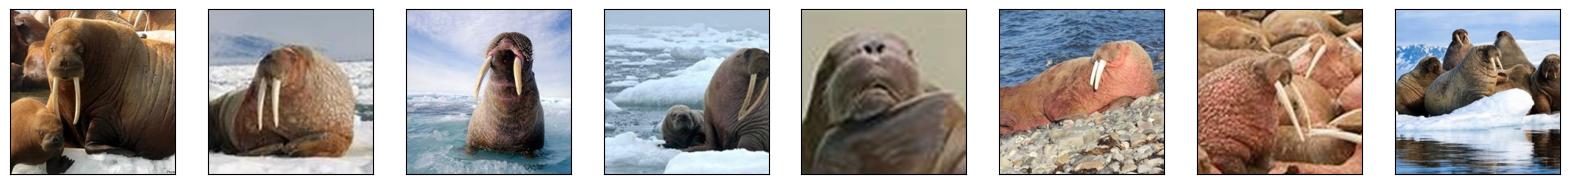

In [9]:
images, labels = load_images_from_path('Data/test/walrus', 2)
show_images(images)

x_test += images
y_test += labels

Chuẩn hóa giá trị pixel về đoạn 0-1

In [10]:
import numpy as np

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

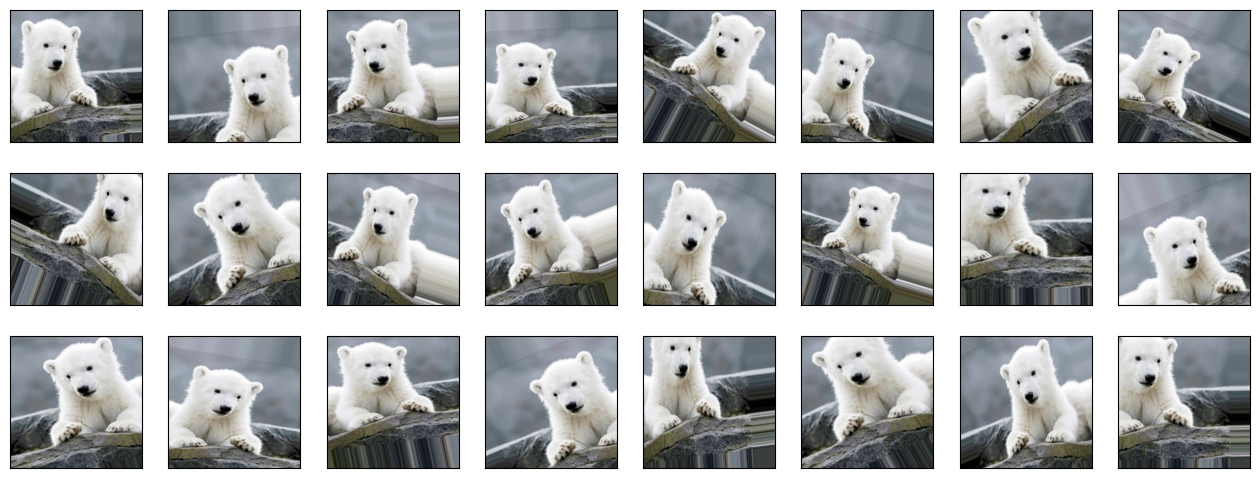

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

# Load an image
x = image.load_img('Data/train/polar_bear/polar_bear_010.jpeg')
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)

# Wrap an ImageDataGenerator around it
idg = ImageDataGenerator(rescale=1./255,
                         horizontal_flip=True,
                         rotation_range=30,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         zoom_range=0.2)
idg.fit(x)

# Generate 24 versions of the image
generator = idg.flow(x, [0], batch_size=1, seed=0)
fig, axes = plt.subplots(3, 8, figsize=(16, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img, label = generator.__next__()
    ax.imshow(img[0])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary(line_length=80)

c:\Users\Richard Nguyen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                 │ (None, 222, 222, 32)     │           896 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)    │ (None, 111, 111, 32)     │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)                 │ (None, 109, 109, 64)     │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)    │ (None, 54, 54, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)                 │ (None, 52, 52, 64)       │        36,928 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)    │ (None, 26, 26, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)                 │ (None, 24, 24, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)    │ (None, 12, 12, 128)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)                 │ (None, 10, 10, 128)      │       147,584 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)    │ (None, 5, 5, 128)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten_1 (Flatten)               │ (None, 3200)             │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 1024)             │     3,277,824 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_3 (Dense)                   │ (None, 3)                │         3,075 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 3,558,659 (13.58 MB)

 Trainable params: 3,558,659 (13.58 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
idg = ImageDataGenerator(rescale=1./255,
                         horizontal_flip=True,
                         rotation_range=30,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         zoom_range = 0.2)

idg.fit(x_train)
image_batch_size = 10
generator = idg.flow(x_train, y_train, batch_size=image_batch_size, seed=0)

model.fit(generator,
          steps_per_epoch = len(x_train) // image_batch_size,
          validation_data = (x_test, y_test),
          batch_size = 20,
          epochs =10)


c:\Users\Richard Nguyen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.3332 - loss: 1.1016 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.2991 - loss: 1.0990 - val_accuracy: 0.3333 - val_loss: 1.0983
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3033 - loss: 1.0988 - val_accuracy: 0.3417 - val_loss: 1.0983
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.2757 - loss: 1.0991 - val_accuracy: 0.3333 - val_loss: 1.0982
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3025 - loss: 1.0988 - val_accuracy: 0.3333 - val_loss: 1.0983
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3371 - loss: 1.0987 - val_accuracy: 0.3917 - val_loss: 1.0982
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3580 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0983
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3645 - loss: 1.0984 - val_accuracy: 0.3333 - v

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.layers import RandomTranslation, RandomZoom

model = Sequential()
model.add(Rescaling(1./255))
model.add(RandomFlip(mode='horizontal'))
model.add(RandomTranslation(0.2, 0.2))
model.add(RandomRotation(0.2))
model.add(RandomZoom(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

c:\Users\Richard Nguyen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
